In [ ]:
import os
tf.keras.backend.clear_session()
resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [ ]:
from zipfile import ZipFile
z = ZipFile('/content/drive/MyDrive/Colab Notebooks/hw02/cifar10/data/train.zip', mode='r')
z.extractall('/content/cifar10/data')

# 開始

In [ ]:
import os
import cv2 
import numpy as np
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D,Activation,BatchNormalization,MaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

import os
tf.keras.backend.clear_session()
resolver = tf.distribute.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.experimental.TPUStrategy(resolver)

# 讀取檔案 


*   設定 training dataset 和 validation dataset
*   validation_split=0.2 validation的比例
*   subset='training' 設定產生的是 training dataset 或 validation dataset
*   seed=0  training 和 validation 的值一定要一樣，確保資料部會重複



In [ ]:
# train_dir='/content/drive/MyDrive/Colab Notebooks/hw02/cifar10/data/train'
train_dir='/content/cifar10/data/train'
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(32, 32),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=0,
    interpolation="bilinear"
)
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(32, 32),
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=0,
    interpolation="bilinear"
)

# tensorflow.keras.datasets import cifar10

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.utils import np_utils
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D,Activation,BatchNormalization,MaxPooling2D
from tensorflow.keras.applications.efficientnet import EfficientNetB6
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split 

# import talos
# from talos.utils.gpu_utils import multi_gpu

# tf.keras.preprocessing.image.random_zoom(image, 0.9, row_axis=0, col_axis=1, channel_axis=2)
# map(lambda image, label: (tf.image.random_contrast(image, 0.3, 0.8), label)).
# t.map( lambda image, label: (tf.image.convert_image_dtype(image, tf.float32),label) )
# map(lambda image, label: (tf.image.random_flip_up_down(image), label))
# .map(lambda image, label: (tf.image.random_flip_left_right(image), label)
#                         ).map(lambda image, label: (tf.image.rot90(image,k=1), label)
#                         )
def get_dataset(train_dataset,batch_size=6000):
  r_train_dataset = train_dataset.cache().map( lambda image, label: (tf.image.random_flip_left_right(image), label)
                      ).shuffle(200).batch(batch_size).repeat(2)

  return r_train_dataset

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 8

# 讀取 cifar10 檔案
((train_feature, train_label), (test_feature, test_label)) = cifar10.load_data()

# MinMax 將 像素縮放到0~1
train_feature_vector = train_feature / 255.0

# onehot 編碼
train_label_onehot = np_utils.to_categorical(train_label)

# 切分 validation_data ，可以不做
(x_train,x_val,y_train,y_val) =train_test_split(train_feature_vector, train_label_onehot, test_size = 0.2, random_state = 0)

# 測試 資料的預處理
test_feature_vector = test_feature / 255.0
test_label_onehot = np_utils.to_categorical(test_label)

# # 各個變數的 shape
# print( 'train feature datas =', train_feature.shape )
# print( 'test feature datas =', test_feature.shape )
# print( 'x_train =', x_train.shape )
# print( 'y_train =', y_train.shape )
# print( 'x_val =', x_val.shape )
# print( 'y_val =', y_val.shape )

BATCH_SIZE = 3000
SHUFFLE_BUFFER_SIZE = 100

tensor_train_data=tf.constant(x_train)
tensor_train_label=tf.constant(y_train,dtype=tf.int32)

train_dataset = tf.data.Dataset.from_tensor_slices((tensor_train_data, tensor_train_label))
# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset =get_dataset(train_dataset)

tensor_val_data=tf.constant(x_val)
tensor_val_label=tf.constant(y_val,dtype=tf.int32)

val_dataset = tf.data.Dataset.from_tensor_slices((tensor_val_data, tensor_val_label))
val_dataset = val_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)



# min max normalization 0～255 轉 0～1




In [ ]:
# from tensorflow.keras import layers
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
# train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), tf.cast(y, dtype=tf.int32)))
# val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), tf.cast(y, dtype=tf.int32)))

# 建立VGG16

In [ ]:
testmodel=create_model(params)
testmodel.summary()

In [ ]:
testmodel=EfficientNetB6(include_top=False, weights='imagenet', input_tensor=None,
              input_shape = (params['input_shape'])
              )
testmodel.summary()

In [ ]:
l2 = tf.keras.regularizers.l2(0.001)
params = {'activation': 'relu',
      'optimizer': 'SGD',
      'losses': 'categorical_crossentropy',
      'batch_size': 1500,
      'epochs': 60,
      'node_1' : 384,
      'node_2' : 256,
      'regularizers' :l2,
      'input_shape' :(32,32,3),
      'output_shape' : 10
    }
def create_model(params):
      net = EfficientNetB6(include_top=False, weights='imagenet', input_tensor=None,
              input_shape = (params['input_shape'])
              )
      
      # 透過layer_name 節取 model的某一層 block3_pool  conv5_block3_out  conv3_block4_out  top_activation
      layer_name='top_activation'

      # 設定取到該層的都使用預設參數，不訓練參數
      layer_index=net.layers.index(net.get_layer(layer_name))
      
      # 建立模型
      base_model = net.get_layer(layer_name).output
      # base_model = tf.keras.layers.Conv2D(512, (3, 2), padding='valid')(base_model)
      # base_model = tf.keras.layers.Activation(tf.nn.relu)(base_model)
      # 攤平 feature map 
      base_model = Flatten()(base_model)

      base_model = Dense(units = params['node_1'], kernel_initializer = tf.keras.initializers.GlorotNormal()
                 ,kernel_regularizer= params['regularizers'] , activation= params['activation'])(base_model)
      base_model = tf.keras.layers.BatchNormalization()(base_model)


      base_model = Dense(units = params['node_2'], kernel_initializer = tf.keras.initializers.GlorotNormal()
                 ,kernel_regularizer = params['regularizers'] , activation= params['activation'])(base_model)

      base_model = Dropout(0.3)(base_model)
      output_layer = Dense(params['output_shape'], activation='softmax', name='softmax')(base_model)

      # 設定凍結與要進行訓練的網路層
      net_final = Model(inputs=net.input, outputs=output_layer)
      for layer in net_final.layers[:layer_index]:
          layer.trainable = False

      return net_final

In [ ]:

with strategy.scope():
  model = create_model(params)
  precision=tf.keras.metrics.Precision(name='precision')
  recall=tf.keras.metrics.Recall(name='recall')
  accuracy=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
  sgd=tf.keras.optimizers.SGD(learning_rate=0.5, momentum=0.5, nesterov=True, name='SGD')
  model.compile(optimizer=sgd,
          loss=params['losses'],
          metrics = [recall,precision,accuracy],
          
          )
  print(model.summary())
  save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
  callbacks_list=[
    tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',mode='min', patience=15 ,restore_best_weights=True),

    tf.keras.callbacks.ModelCheckpoint("saved_model_05051", monitor='val_loss', verbose=1,mode='min',save_best_only=True,options=save_locally),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                          patience=3,                      
                          verbose=1,
                          factor=0.3,  
                          min_lr=0.000001 )  
          ]
          # x_train,y_train, (x_val,y_val),
  out = model.fit(train_dataset,
            validation_data=val_dataset,
            epochs=200,
            callbacks=callbacks_list               
              )
  

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 32, 32, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 32, 32, 3)    7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization_3[0][0]            
____________________________________________________________________________________________

INFO:tensorflow:Assets written to: saved_model_05051/assets


Epoch 2/200
14/14 [==============================] - 6s 396ms/step - loss: 3.2374 - recall: 0.0000e+00 - precision: 0.0000e+00 - accuracy: 0.1006 - val_loss: 3.4494 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.1004

Epoch 00002: val_loss improved from 4.07490 to 3.44943, saving model to saved_model_05051
INFO:tensorflow:Assets written to: saved_model_05051/assets


INFO:tensorflow:Assets written to: saved_model_05051/assets


Epoch 3/200
14/14 [==============================] - 6s 421ms/step - loss: 3.1791 - recall: 0.0000e+00 - precision: 0.0000e+00 - accuracy: 0.1002 - val_loss: 3.2267 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.1004

Epoch 00003: val_loss improved from 3.44943 to 3.22669, saving model to saved_model_05051
INFO:tensorflow:Assets written to: saved_model_05051/assets


INFO:tensorflow:Assets written to: saved_model_05051/assets


Epoch 4/200
14/14 [==============================] - 6s 402ms/step - loss: 3.1300 - recall: 0.0000e+00 - precision: 0.0000e+00 - accuracy: 0.0984 - val_loss: 3.1197 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.1004

Epoch 00004: val_loss improved from 3.22669 to 3.11968, saving model to saved_model_05051


# 訓練 驗證 績效圖

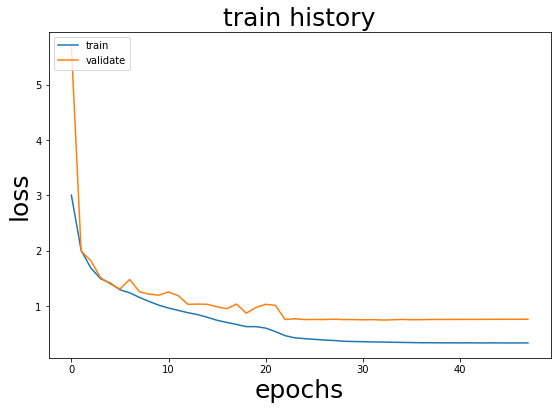

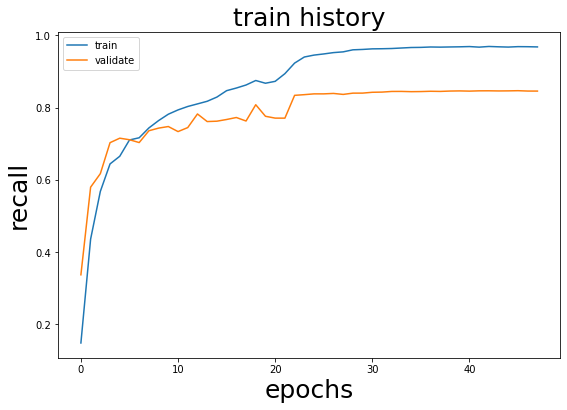

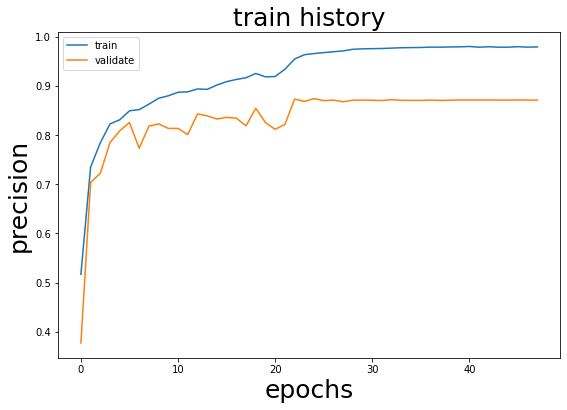

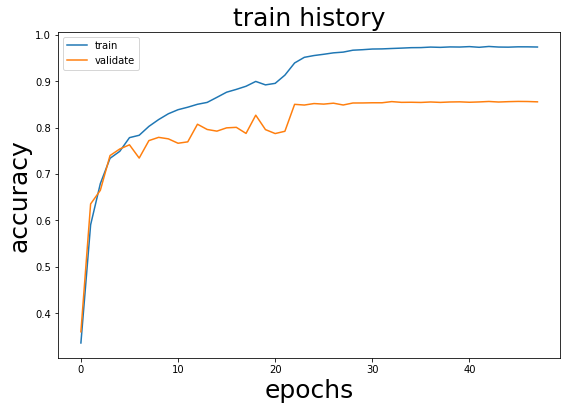

313/313 [==============================] - 13s 32ms/step - loss: 0.7672 - recall: 0.8370 - precision: 0.8647 - accuracy: 0.8472
loss ： 0.76722
precision：0.83700
recall：0.86467
accuracy： 0.84720
f1score：0.85061


In [ ]:
import matplotlib.pyplot as plot  # plot 可以視為畫布

def train_history_graphic( history       # 資料集合
                         , history_key1  # 資料集合裡面的來源 1 (有 loss, acc, val_loss, val_acc 四種)
                         , history_key2  # 資料集合裡面的來源 2 (有 loss, acc, val_loss, val_acc 四種)
                         , y_label       # Y 軸標籤文字
                         , index=0
                         ) :
    plot.figure(figsize=(9,6))
    font_size=25
    # 資料來源 1
    plot.plot( history.history[history_key1][index:] )
    # 資料來源 2
    plot.plot( history.history[history_key2][index:] )
    # 標題
    plot.title( 'train history',fontsize=font_size )
    # X 軸標籤文字
    plot.xlabel( 'epochs',fontsize=font_size )
    # Y 軸標籤文字
    plot.ylabel( y_label,fontsize=font_size )
    # 設定圖例
    # (參數 1 為圖例說明, 有幾個資料來源, 就對應幾個圖例說明)
    # (參數 2 為圖例位置, upper 為上面, lower 為下面, left 為左邊, right 為右邊)
    plot.legend( ['train', 'validate']
               , loc = 'upper left'
               )
    # 顯示畫布
    plot.show()
# 

#############################################
metrics_list=['loss','recall','precision','accuracy']
for metrics in metrics_list :
  train_history_graphic( out, metrics, f'val_{metrics}', metrics, 0 )

preds=model.evaluate(test_feature_vector,test_label_onehot)
print('loss ： %.5f' % preds[0])
print('precision：%.5f' % preds[1])
print('recall：%.5f' % preds[2])
print('accuracy： %.5f' %preds[3])
F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('f1score：%.5f' % F1)
preds.append(F1)

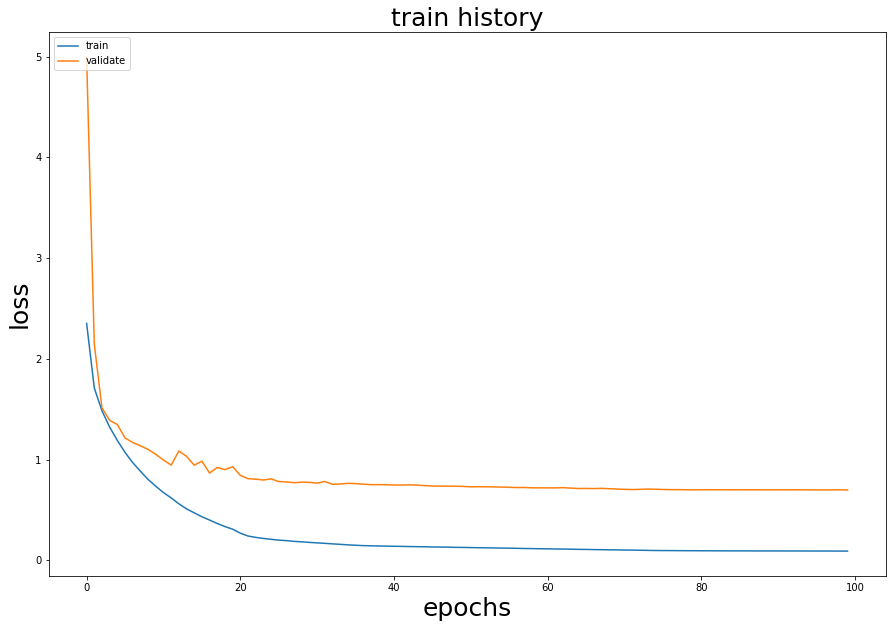

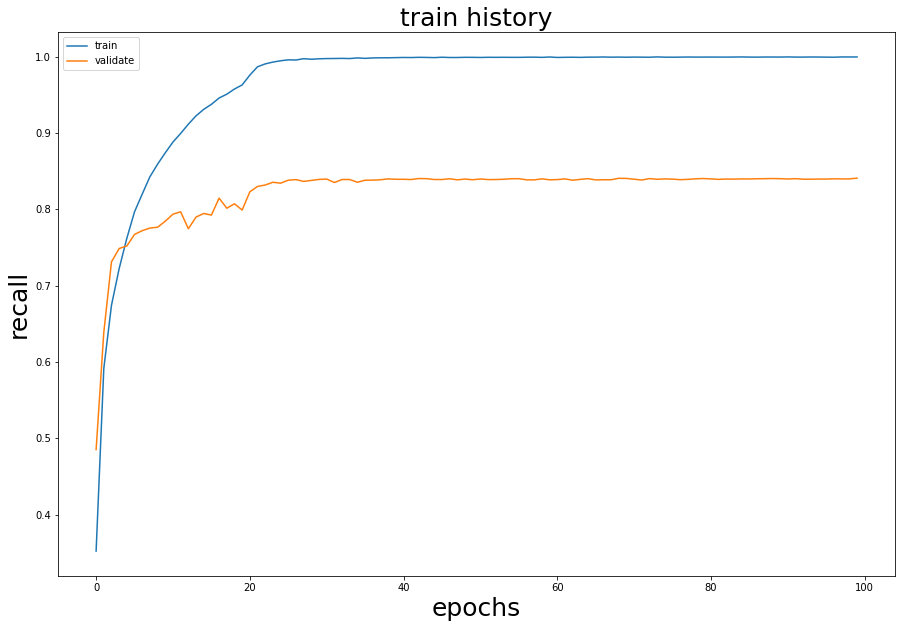
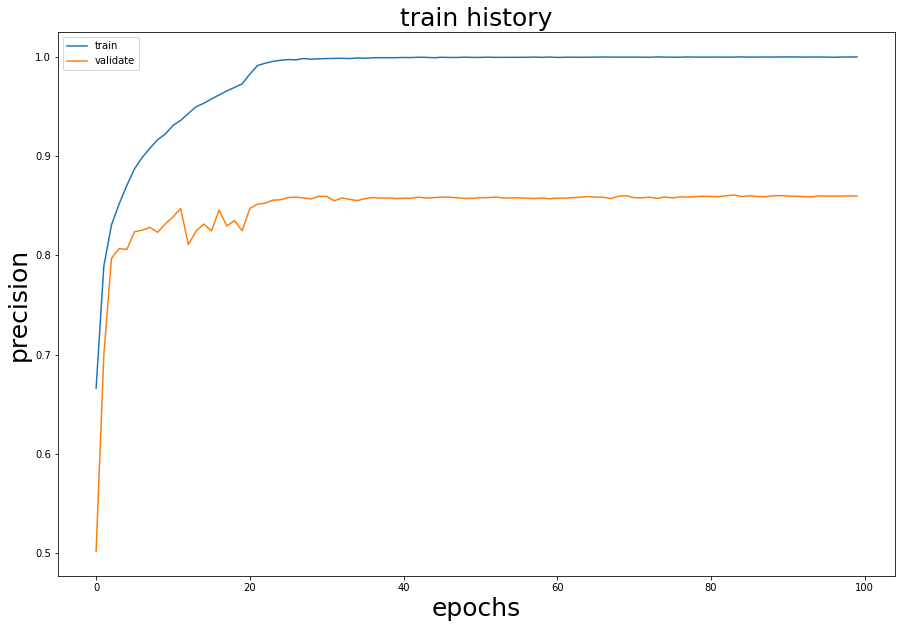
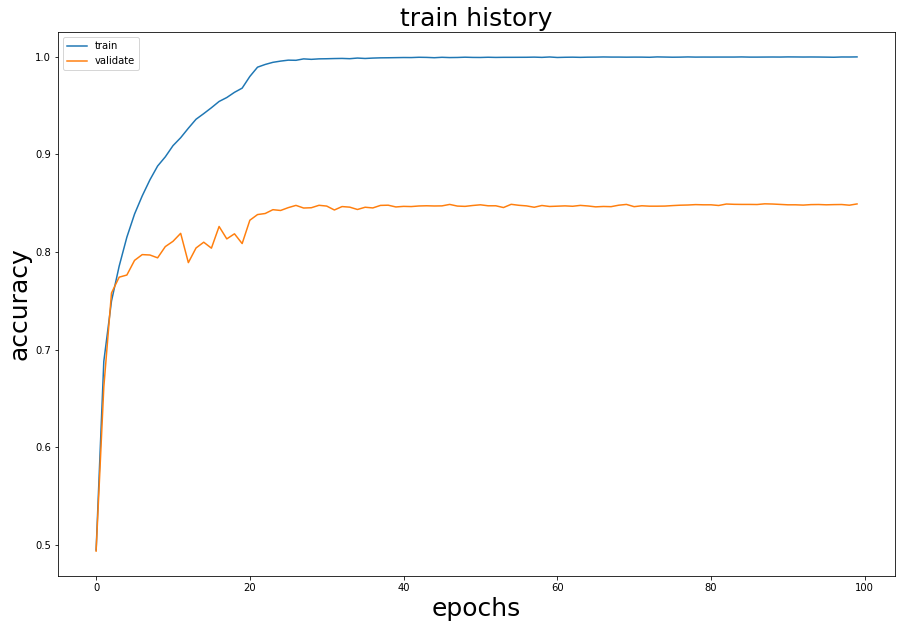

# precision,recall,accuracy 計算

In [ ]:
# vgg1=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/hw02/cifar10/C10_VGG16_01')
# /content/saved_model_0504
#   save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
load_locally=tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
vgg1=tf.keras.models.load_model('/content/saved_model_0504',options=load_locally)

In [ ]:
# precision=tf.keras.metrics.Precision(name='precision')
# recall=tf.keras.metrics.Recall(name='recall')
# accuracy=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
# vgg1.compile(optimizer='Adam',
#     loss='categorical_crossentropy',
#     metrics = [precision,recall,accuracy]
#           )


In [ ]:
preds=vgg1.evaluate(test_feature_vector,test_label_onehot)
print('loss ： %.5f' % preds[0])
print('precision：%.5f' % preds[1])
print('recall：%.5f' % preds[2])
print('accuracy： %.5f' %preds[3])
F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('f1score：%.5f' % F1)
preds.append(F1)

313/313 [==============================] - 11s 30ms/step - loss: 0.7018 - recall: 0.8298 - precision: 0.8522 - accuracy: 0.8386
loss ： 0.70181
precision：0.82980
recall：0.85221
accuracy： 0.83860
f1score：0.84086


In [ ]:
df=pd.DataFrame([preds],columns=['loss','precision','recall','accuracy','f1score'])
df

,loss,precision,recall,accuracy,f1score
0,0.70181,0.8298,0.852213,0.8386,0.840857


In [ ]:
def evaluate_model_1(model,test_dataset):
  precision=tf.keras.metrics.Precision(name='precision')
  recall=tf.keras.metrics.Recall(name='recall')
  accuracy=tf.keras.metrics.CategoricalAccuracy(name='accuracy')
  model.compile(optimizer='Adam',
        loss='categorical_crossentropy',
        metrics = [precision,recall,accuracy]
              )
  preds=model.evaluate(test_dataset)
  print(model)
  print('loss ： %.5f' % preds[0])
  print('precision：%.5f' % preds[1])
  print('recall：%.5f' % preds[2])
  print('accuracy： %.5f' %preds[3])
  F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
  print('f1score：%.5f' % F1)
  print("===========================================")
  preds.append(F1)
  return pd.DataFrame(preds,columns=['loss','precision','recall','accuracy','f1score'])

# model out 
df=evaluate_model_1(vgg1,test_dataset)
df

In [ ]:
from sklearn.metrics import accuracy_score
